In [141]:
import numpy as np
from matplotlib import pyplot

In [142]:
# Load data
# The first four columns contains the ambient variables and the fifth column
# contains electricity generated.
data = np.genfromtxt('train_data.csv' ,  delimiter = ',' , skip_header = 1 )
X, y = data[:, 0:4], data[:, 4]
m = y.size  # number of training examples

In [143]:
def  featureNormalize(X):
    """"
    Normalizes the features in X. returns a normalized version of X where
    the mean value of each feature is 0 and the standard deviation
    is 1.
    
    Parameters
    ----------
    X : array_like
        The dataset of shape (m x n).
    
    Returns
    -------
    X_norm : array_like
        The normalized dataset of shape (m x n).
    """
    X_norm = X.copy()
    mu = np.zeros(X.shape[1])
    sigma = np.zeros(X.shape[1])
    
    n = X.shape[1]
    for i in range (n):
        mu[i] = X[: , i].mean()
        sigma[i] = X[: , i].std()
        X_norm[:,  i] = (X_norm[:, i] - mu[i]) / sigma[i]
        
    return X_norm, mu, sigma

In [144]:
# call featureNormalize on the loaded data
X_norm, mu, sigma = featureNormalize(X)

print('Computed mean:', mu)
print('Computed standard deviation:', sigma)

Computed mean: [256.01082  325.21758   92.111935  44.16964 ]
Computed standard deviation: [95.1644883  76.26899879  0.53900539  8.77093835]


In [145]:
# Add intercept term to X
X_norm = np.concatenate([np.ones((m, 1)), X_norm], axis=1)


In [146]:
def computeCost(theta, X, y):
    """
    Compute cost for linear regression. Computes the cost of using theta as the
    parameter for linear regression to fit the data points in X and y.
    
    Parameters
    ----------
    X : array_like
        The input dataset of shape (m x n+1), where m is the number of examples,
        and n is the number of features. We assume a vector of one's already 
        appended to the features so we have n+1 columns.
    
    y : array_like
        The values of the function at each data point. This is a vector of
        shape (m, ).
    
    theta : array_like
        The parameters for the regression function. This is a vector of 
        shape (n+1, ).
    
    Returns
    -------
    J : float
        The value of the regression cost function.
    """
    m = y.shape[0]
    J = 0
    
    #h = np.dot(X , theta) # hypothesis function 
    #J = (1/ (2 * m)) * np.sum(np.square(h - y))
    
    J = (1/ (2*m))* ((np.dot(X, theta) - y).T).dot(((np.dot(X, theta) - y)))
    
    return J 

In [147]:
initial_theta = np.zeros(X_norm.shape[1])
J = computeCost(initial_theta, X_norm , y)
print('With initial_theta (zeros) \nCost computed = %.2f' % J)


With initial_theta (zeros) 
Cost computed = 1653056.86


In [148]:
def gradientDescent(X, y, theta, alpha, num_iters):
    """
    Performs gradient descent to learn `theta`. Updates theta by taking `num_iters`
    gradient steps with learning rate `alpha`.
    
    Parameters
    ----------
    X : array_like
        The input dataset of shape (m x n+1).
    
    y : array_like
        Value at given features. A vector of shape (m, ).
    
    theta : array_like
        Initial values for the linear regression parameters. 
        A vector of shape (n+1, ).
    
    alpha : float
        The learning rate.
    
    num_iters : int
        The number of iterations for gradient descent. 
    
    Returns
    -------
    theta : array_like
        The learned linear regression parameters. A vector of shape (n+1, ).
    
    J_history : list
        A python list for the values of the cost function after each iteration.
    """
    J_history = []
    m = y.size
    
    # make a copy of theta, to avoid changing the original array, since numpy arrays
    # are passed by reference to functions
    theta = theta.copy()
    
    for i in range (num_iters):
        theta = theta - (alpha/m) * (np.dot(X, theta) - y).dot(X)
 
        # save the cost J in every iteration
        J_history.append(computeCost(X, y, theta))
        
    return theta, J_history

In [165]:
theta = np.zeros(X_norm.shape[1])

# some gradient descent settings
iterations = 100
alpha = 0.1

theta, J_history = gradientDescent(X_norm ,y, theta, alpha, iterations)
print('Theta found by gradient descent: {:.4f}, {:.4f}, {:.4f}, {:.4f}, {:.4f}'.format(*theta))
print (J_history[:5])

Theta found by gradient descent: 1817.0046, -46.2844, -20.1929, 3.1833, -5.6202
[1324191273879.4082, 1324072143970.7136, 1323964969913.115, 1323868545925.9377, 1323781789233.2715]


Text(0, 0.5, 'Cost J')

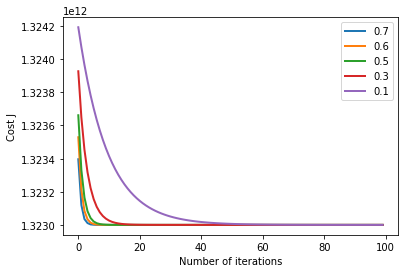

In [150]:
alpha = [0.7 ,0.6 , 0.5, 0.3, 0.1]
#alpha = [0.7] 
num_iters = 100

# init theta and run gradient descent

for i in range (len(alpha)):
    theta = np.zeros(X_norm.shape[1])
    theta, J_history = gradientDescent(X_norm, y, theta, alpha[i], num_iters)

    # Plot the convergence graph
    pyplot.plot(np.arange(len(J_history)), J_history, lw=2)
    pyplot.legend(alpha)
    
pyplot.xlabel('Number of iterations')
pyplot.ylabel('Cost J')

[1773.33568126 1873.55524941 1760.31651275 1868.12303621 1821.15207938]


Text(0, 0.5, 'E')

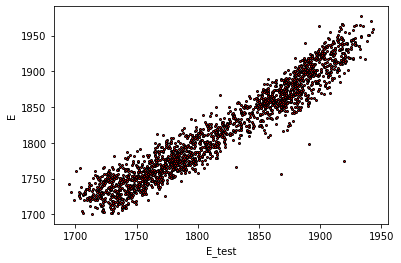

In [167]:
E_test = np.dot(X_norm , theta)
print(E_test[:5])

pyplot.plot(E_test, y,'ro', ms = 2, mec = 'k')
pyplot.xlabel('E_test')
pyplot.ylabel('E')

In [168]:
Avg_err = ((E_test - y)/ y) * 100
Avg_err = Avg_err.mean()
print(Avg_err, '%')

0.008261650341766952 %


In [170]:
New_data = np.genfromtxt('test_data.csv' ,  delimiter = ',' , skip_header = 1 )
New_data = (New_data - mu) / sigma
New_data = np.concatenate([np.ones((New_data.shape[0], 1)), New_data], axis=1)
E = np.dot(New_data , theta)
E = np.round(E, 2)
print(E[:5])
np.savetxt('Output.csv', E)

[1795.19 1823.18 1888.82 1897.72 1802.04]
